In [1]:
addpath([pwd '/machine-learning-ex5/ex5'])

In [3]:
load('ex5data1.mat')

In [4]:
whos

Variables in the current scope:

   Attr Name        Size                     Bytes  Class
   ==== ====        ====                     =====  ===== 
        X          12x1                         96  double
        Xtest      21x1                        168  double
        Xval       21x1                        168  double
        ans         1x5                          5  char
        y          12x1                         96  double
        ytest      21x1                        168  double
        yval       21x1                        168  double

Total is 113 elements using 869 bytes



In [6]:
a = ones(5,1)

a =

   1
   1
   1
   1
   1



In [9]:
a(2:end) = a(2:end) + ones(4,1)

a =

   1
   2
   2
   2
   2



In [10]:
a

a =

   1
   2
   2
   2
   2



In [11]:
5 * a

ans =

    5
   10
   10
   10
   10



In [20]:
warning('off','Octave:divide-by-zero');

Loading and Visualizing Data ...


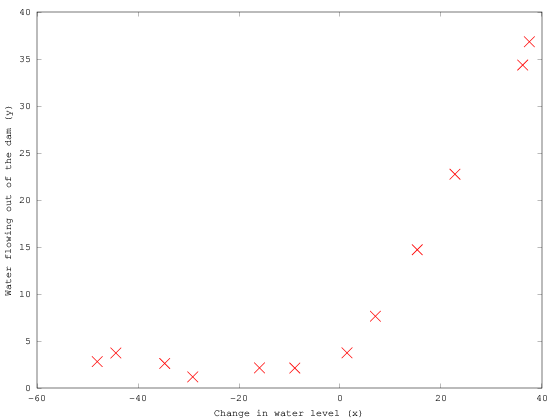

In [21]:
%% =========== Part 1: Loading and Visualizing Data =============
%  We start the exercise by first loading and visualizing the dataset. 
%  The following code will load the dataset into your environment and plot
%  the data.
%

% Load Training Data
fprintf('Loading and Visualizing Data ...\n')

% Load from ex5data1: 
% You will have X, y, Xval, yval, Xtest, ytest in your environment
load ('ex5data1.mat');

% m = Number of examples
m = size(X, 1);

% Plot training data
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');

In [22]:
%% =========== Part 2: Regularized Linear Regression Cost =============
%  You should now implement the cost function for regularized linear 
%  regression. 
%

theta = [1 ; 1];
J = linearRegCostFunction([ones(m, 1) X], y, theta, 1);

fprintf(['Cost at theta = [1 ; 1]: %f '...
         '\n(this value should be about 303.993192)\n'], J);

Cost at theta = [1 ; 1]: 303.993192 
(this value should be about 303.993192)


In [23]:
%% =========== Part 3: Regularized Linear Regression Gradient =============
%  You should now implement the gradient for regularized linear 
%  regression.
%

theta = [1 ; 1];
[J, grad] = linearRegCostFunction([ones(m, 1) X], y, theta, 1);

fprintf(['Gradient at theta = [1 ; 1]:  [%f; %f] '...
         '\n(this value should be about [-15.303016; 598.250744])\n'], ...
         grad(1), grad(2));

Gradient at theta = [1 ; 1]:  [-15.303016; 598.250744] 
(this value should be about [-15.303016; 598.250744])


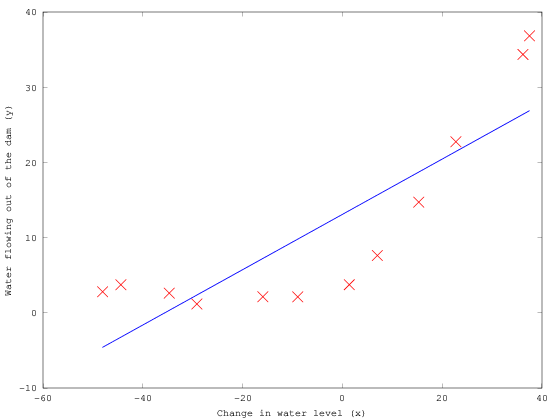

In [24]:
%% =========== Part 4: Train Linear Regression =============
%  Once you have implemented the cost and gradient correctly, the
%  trainLinearReg function will use your cost function to train 
%  regularized linear regression.
% 
%  Write Up Note: The data is non-linear, so this will not give a great 
%                 fit.
%

%  Train linear regression with lambda = 0
lambda = 0;
[theta] = trainLinearReg([ones(m, 1) X], y, lambda);

%  Plot fit over the data
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
hold on;
plot(X, [ones(m, 1) X]*theta, '--', 'LineWidth', 2)
hold off;

Iteration     2 | Cost: 0.000000e+00
Iteration    21 | Cost: 4.437343e-31
Iteration    31 | Cost: 3.286595e+00
Iteration    10 | Cost: 2.842678e+00
Iteration     5 | Cost: 1.315405e+01
Iteration    19 | Cost: 1.944396e+01
Iteration    12 | Cost: 2.009852e+01
Iteration     4 | Cost: 1.817286e+01
Iteration    15 | Cost: 2.260941e+01
Iteration     9 | Cost: 2.326146e+01
Iteration     8 | Cost: 2.431725e+01
Iteration    43 | Cost: 2.237391e+01
# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	204.827168
  	2		0.000000	110.300366
  	3		3.286595	45.010231
  	4		2.842678	48.368911
  	5		13.154049	35.865165
  	6		19.443963	33.829962
  	7		20.098522	31.970986
  	8		18.172859	30.862446
  	9		22.609405	31.135998
  	10		23.261462	28.936207
  	11		24.317250	29.551432
  	12		22.373906	29.433818


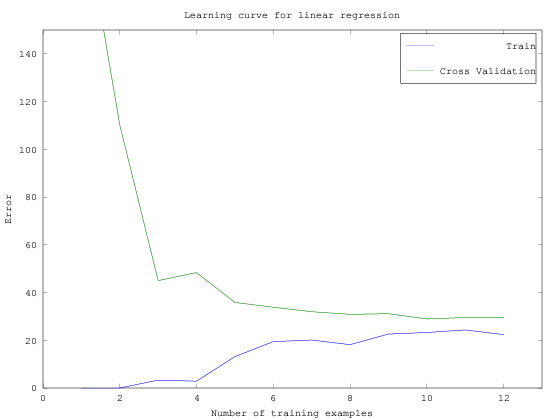

In [25]:
%% =========== Part 5: Learning Curve for Linear Regression =============
%  Next, you should implement the learningCurve function. 
%
%  Write Up Note: Since the model is underfitting the data, we expect to
%                 see a graph with "high bias" -- Figure 3 in ex5.pdf 
%

lambda = 0;
[error_train, error_val] = ...
    learningCurve([ones(m, 1) X], y, ...
                  [ones(size(Xval, 1), 1) Xval], yval, ...
                  lambda);

plot(1:m, error_train, 1:m, error_val);
title('Learning curve for linear regression')
legend('Train', 'Cross Validation')
xlabel('Number of training examples')
ylabel('Error')
axis([0 13 0 150])

fprintf('# Training Examples\tTrain Error\tCross Validation Error\n');
for i = 1:m
    fprintf('  \t%d\t\t%f\t%f\n', i, error_train(i), error_val(i));
end

In [27]:
%% =========== Part 6: Feature Mapping for Polynomial Regression =============
%  One solution to this is to use polynomial regression. You should now
%  complete polyFeatures to map each example into its powers
%

p = 8;

% Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p);
[X_poly, mu, sigma] = featureNormalize(X_poly);  % Normalize
X_poly = [ones(m, 1), X_poly];                   % Add Ones

% Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p);
X_poly_test = bsxfun(@minus, X_poly_test, mu);
X_poly_test = bsxfun(@rdivide, X_poly_test, sigma);
X_poly_test = [ones(size(X_poly_test, 1), 1), X_poly_test];         % Add Ones

% Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p);
X_poly_val = bsxfun(@minus, X_poly_val, mu);
X_poly_val = bsxfun(@rdivide, X_poly_val, sigma);
X_poly_val = [ones(size(X_poly_val, 1), 1), X_poly_val];           % Add Ones

fprintf('Normalized Training Example 1:\n');
fprintf('  %f  \n', X_poly(1, :));

Normalized Training Example 1:
  1.000000  
  -0.362141  
  -0.755087  
  0.182226  
  -0.706190  
  0.306618  
  -0.590878  
  0.344516  
  -0.508481  


Iteration    58 | Cost: 7.268148e+00
Iteration    42 | Cost: 0.000000e+006
Iteration    46 | Cost: 7.269436e-02
Iteration    41 | Cost: 1.849879e+01
Iteration    61 | Cost: 1.457586e+01
Iteration    68 | Cost: 1.166072e+01
Iteration    76 | Cost: 1.011882e+01
Iteration    72 | Cost: 9.416317e+00
Iteration    87 | Cost: 8.256224e+00
Iteration    88 | Cost: 7.802076e+00
Iteration    25 | Cost: 7.064398e+00
Iteration    28 | Cost: 6.423784e+00
Iteration    51 | Cost: 7.268148e+00
Polynomial Regression (lambda = 1.000000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	138.846777
  	2		0.045772	143.522890
  	3		2.911375	5.534713
  	4		1.499413	6.609883
  	5		1.199183	6.634076
  	6		0.924511	8.291979
  	7		1.540897	5.737166
  	8		1.422968	5.516444
  	9		1.553733	6.239740
  	10		1.441565	5.983045
  	11		1.308147	6.043752
  	12		2.076188	4.260625


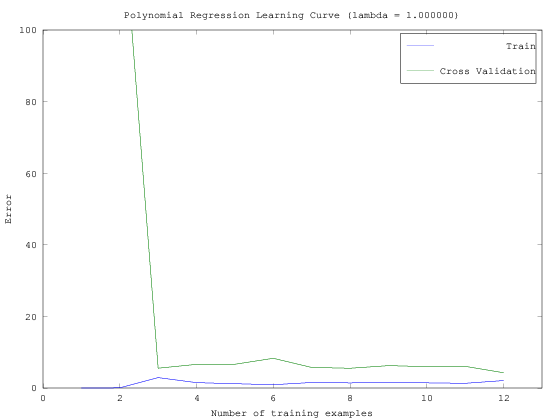

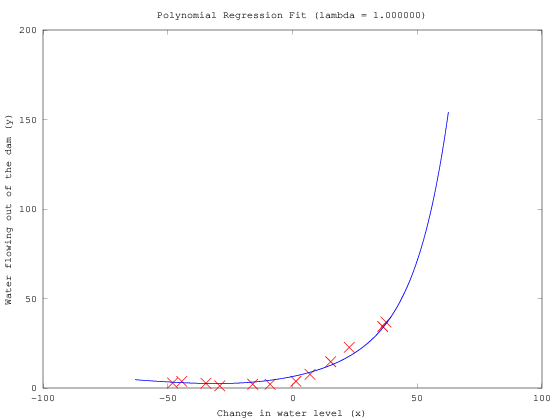

In [36]:
%% =========== Part 7: Learning Curve for Polynomial Regression =============
%  Now, you will get to experiment with polynomial regression with multiple
%  values of lambda. The code below runs polynomial regression with 
%  lambda = 0. You should try running the code with different values of
%  lambda to see how the fit and learning curve change.
%

lambda = 1;
[theta] = trainLinearReg(X_poly, y, lambda);

% Plot training data and fit
figure(1);
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
plotFit(min(X), max(X), mu, sigma, theta, p);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
title (sprintf('Polynomial Regression Fit (lambda = %f)', lambda));

figure(2);
[error_train, error_val] = ...
    learningCurve(X_poly, y, X_poly_val, yval, lambda);
plot(1:m, error_train, 1:m, error_val);

title(sprintf('Polynomial Regression Learning Curve (lambda = %f)', lambda));
xlabel('Number of training examples')
ylabel('Error')
axis([0 13 0 100])
legend('Train', 'Cross Validation')

fprintf('Polynomial Regression (lambda = %f)\n\n', lambda);
fprintf('# Training Examples\tTrain Error\tCross Validation Error\n');
for i = 1:m
    fprintf('  \t%d\t\t%f\t%f\n', i, error_train(i), error_val(i));
end

Iteration   200 | Cost: 1.213882e-01
Iteration   200 | Cost: 1.862327e-01
Iteration   200 | Cost: 2.505767e-01
Iteration   200 | Cost: 3.850630e-01
Iteration   200 | Cost: 6.692749e-01
Iteration   167 | Cost: 1.443470e+00
Iteration   100 | Cost: 3.101591e+00
Iteration    58 | Cost: 7.268148e+00
Iteration    32 | Cost: 1.586769e+01
Iteration    25 | Cost: 3.337220e+01
lambda		Train Error	Validation Error
 0.000000	0.121388	13.080541
 0.001000	0.151640	16.432979
 0.003000	0.175861	18.426290
 0.010000	0.221481	16.961165
 0.030000	0.281855	12.829307
 0.100000	0.459318	7.587015
 0.300000	0.921760	4.636833
 1.000000	2.076188	4.260626
 3.000000	4.901351	3.822907
 10.000000	16.092213	9.945509


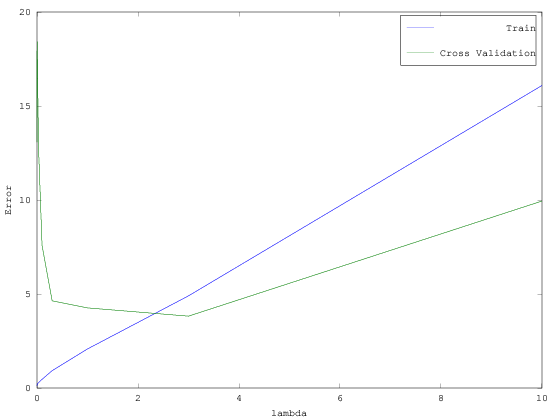

In [45]:
%% =========== Part 8: Validation for Selecting Lambda =============
%  You will now implement validationCurve to test various values of 
%  lambda on a validation set. You will then use this to select the
%  "best" lambda value.
%

[lambda_vec, error_train, error_val] = ...
    validationCurve(X_poly, y, X_poly_val, yval);

close all;
plot(lambda_vec, error_train, lambda_vec, error_val);
legend('Train', 'Cross Validation');
xlabel('lambda');
ylabel('Error');

fprintf('lambda\t\tTrain Error\tValidation Error\n');
for i = 1:length(lambda_vec)
	fprintf(' %f\t%f\t%f\n', ...
            lambda_vec(i), error_train(i), error_val(i));
end

In [46]:
whos

Variables in the current scope:

   Attr Name             Size                     Bytes  Class
   ==== ====             ====                     =====  ===== 
        J                1x1                          8  double
        X               12x1                         96  double
        X_poly          12x9                        864  double
        X_poly_test     21x9                       1512  double
        X_poly_val      21x9                       1512  double
        Xtest           21x1                        168  double
        Xval            21x1                        168  double
        a                5x1                         40  double
        ans              1x1                          8  double
        error_train     10x1                         80  double
        error_val       10x1                         80  double
        grad             2x1                         16  double
        i                1x1                          8  double
        

In [72]:
lambda = 2;
[theta] = trainLinearReg(X_poly, y, lambda);
crossValError = linearRegCostFunction(X_poly_val, yval , theta, 0)
testError = linearRegCostFunction(X_poly_test, ytest , theta, 0)

Iteration    41 | Cost: 1.193299e+01
crossValError =  3.9884
testError =  2.9111


In [73]:
whos

Variables in the current scope:

   Attr Name               Size                     Bytes  Class
   ==== ====               ====                     =====  ===== 
        J                  1x1                          8  double
        X                 12x1                         96  double
        X_poly            12x9                        864  double
        X_poly_test       21x9                       1512  double
        X_poly_val        21x9                       1512  double
        Xtest             21x1                        168  double
        Xval              21x1                        168  double
        a                  5x1                         40  double
        ans                1x1                          8  double
        crossValError      1x1                          8  double
        error_train       10x1                         80  double
        error_val         10x1                         80  double
        grad               2x1              

In [80]:
a = [1;2;3;4;5]

a =

   1
   2
   3
   4
   5



In [87]:
a(randperm(length(a),2))

ans =

   3
   5



Polynomial Regression (lambda = 0.010000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	166.772463
  	2		0.010680	68.447110
  	3		0.027425	41.343194
  	4		0.028410	38.061501
  	5		0.042204	17.434208
  	6		0.061979	20.170248
  	7		0.102388	19.323800
  	8		0.127955	14.009085
  	9		0.157204	15.071869
  	10		0.183188	18.439004
  	11		0.207791	16.405757
  	12		0.221861	15.644194


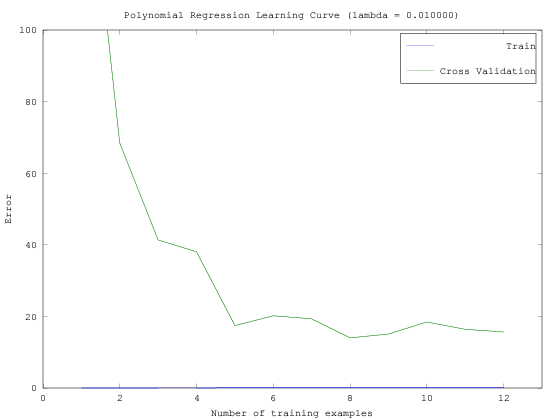

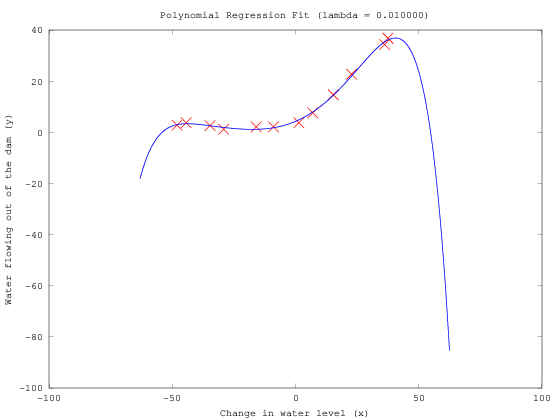

In [94]:
%% =========== Part 7: Learning Curve for Polynomial Regression (with sample randomization) =============

lambda = 0.01;
[theta] = trainLinearReg(X_poly, y, lambda);

% Plot training data and fit
figure(1);
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
plotFit(min(X), max(X), mu, sigma, theta, p);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
title (sprintf('Polynomial Regression Fit (lambda = %f)', lambda));

figure(2);
[error_train, error_val] = ...
    learningCurveRandom(X_poly, y, X_poly_val, yval, lambda);
plot(1:m, error_train, 1:m, error_val);

title(sprintf('Polynomial Regression Learning Curve (lambda = %f)', lambda));
xlabel('Number of training examples')
ylabel('Error')
axis([0 13 0 100])
legend('Train', 'Cross Validation')

fprintf('Polynomial Regression (lambda = %f)\n\n', lambda);
fprintf('# Training Examples\tTrain Error\tCross Validation Error\n');
for i = 1:m
    fprintf('  \t%d\t\t%f\t%f\n', i, error_train(i), error_val(i));
end